In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
cars_data_df = pd.read_csv("cars-dataset.csv")


In [3]:
cars_data_df.shape

(398, 8)

In [199]:
#EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [4]:
cars_data_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [6]:
#check for missing values
cars_data_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
hp,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6


In [202]:
#From the data , we see that max value of hp is 230 , so replacing "?" with 230.

In [8]:
cars_data_df['hp']=cars_data_df['hp'].replace('?','230')

In [9]:
Cars_Corrected_df=cars_data_df.astype({'hp': 'float64'})

In [10]:
Cars_Corrected_df.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [11]:
Cars_Corrected_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,106.361809,41.155107,46.0,76.000,95.0,130.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [12]:
#car name is nor required for clustering , hence removing it

In [13]:
Cars_Corrected_df.drop('car name',axis =1 , inplace=True)

In [14]:
#Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

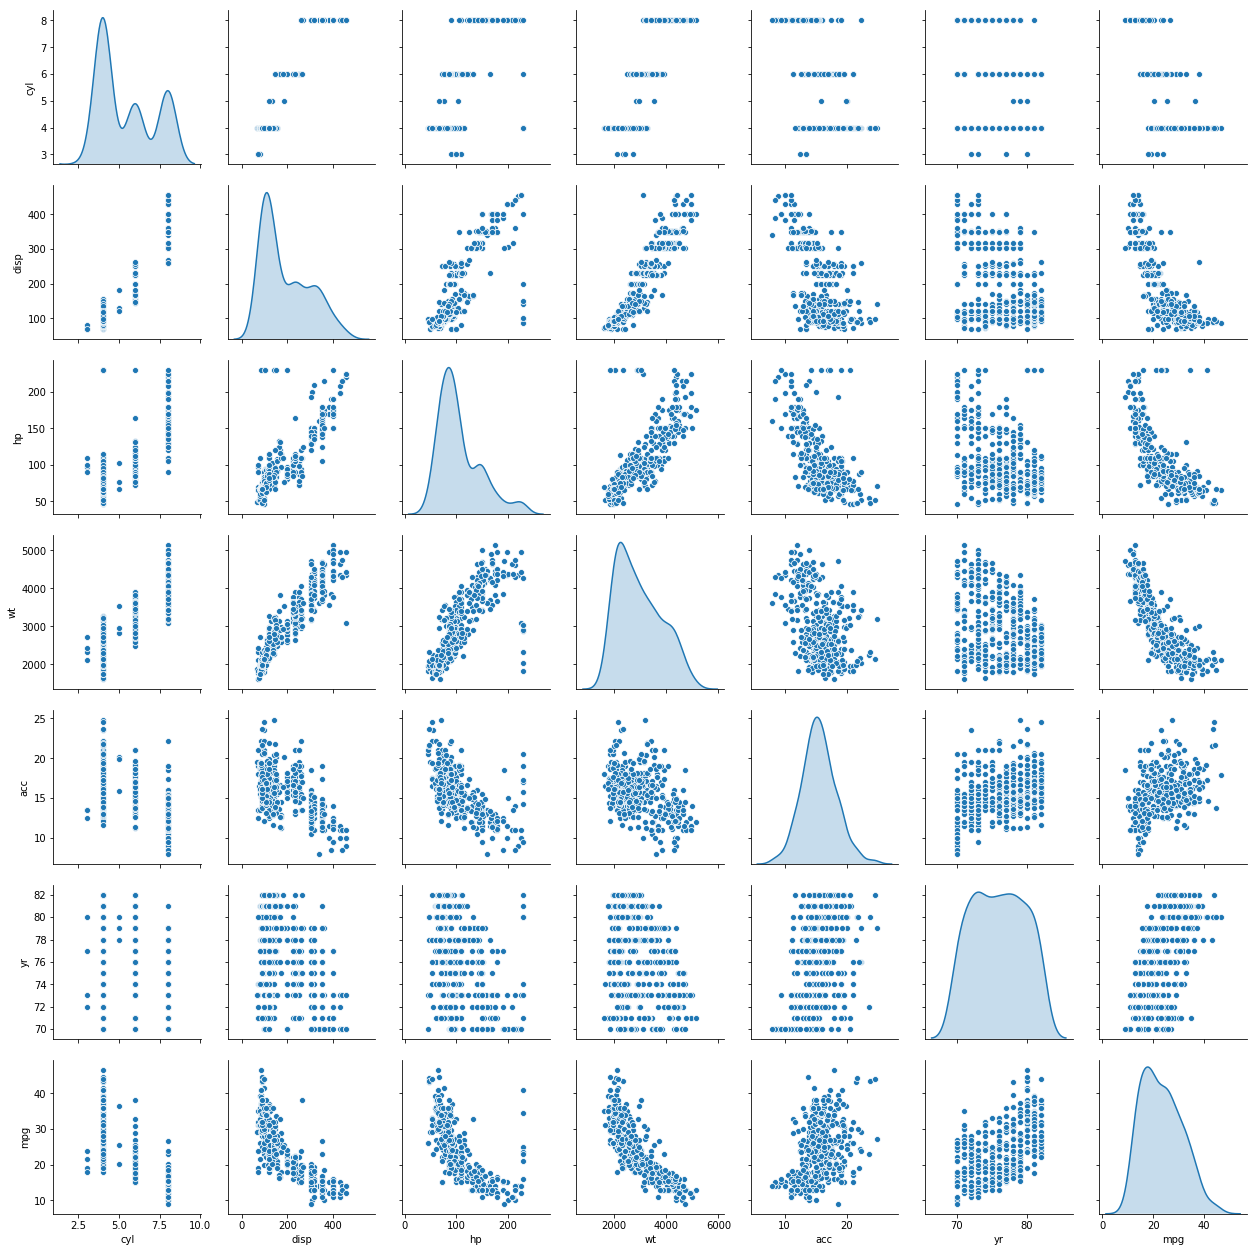

In [15]:
sns.pairplot(Cars_Corrected_df,diag_kind='kde')

In [211]:
#Looking at the density distribution , most of the variables are spread among 3 clusters and 2 clusters.
#lets look at the optimal clusters by elbow method

In [215]:
#Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points

In [216]:
#not considering mpg for clustering as its the output

In [16]:
#Standardizing the data using z score

In [18]:

from scipy.stats import zscore

In [19]:
Final_df=Cars_Corrected_df.drop('mpg',axis=1).apply(zscore)

In [20]:
Final_df.head()

,cyl,disp,hp,wt,acc,yr
0,1.498191,1.090604,0.575091,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.426603,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.061669,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.061669,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.818380,0.565841,-1.840117,-1.627426


In [23]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(2,11):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300,random_state=1)
    
    #Fit on the data
    km.fit(Final_df)
    
    #Add cluster information for each record in dataframe
    Final_df['k_' + str(i)] = km.predict(Final_df)
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

In [24]:
sse_df

,K,SSE
0,2.0,1122.421017
1,3.0,875.448760
2,4.0,715.607856
3,5.0,651.588161
4,6.0,592.678187
5,7.0,530.642129
6,8.0,480.033459
7,9.0,429.751646
8,10.0,406.163465


In [25]:
#conduct the elbow test to find the optimal number of clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

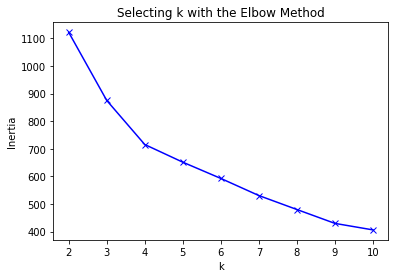

In [26]:
plt.plot(sse_df['K'],sse_df['SSE'],'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Selecting k with the Elbow Method')


In [27]:
#The bend is at 4 clusters

In [29]:
Cars_Corrected_df['labels']=Final_df['k_4']

In [30]:
Cars_Corrected_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
0,8,307.0,130.0,3504,12.0,70,18.0,1
1,8,350.0,165.0,3693,11.5,70,15.0,1
2,8,318.0,150.0,3436,11.0,70,18.0,1
3,8,304.0,150.0,3433,12.0,70,16.0,1
4,8,302.0,140.0,3449,10.5,70,17.0,1


In [31]:
#Run the linear regression on different clusters

In [32]:
Cluster_0=Cars_Corrected_df[Cars_Corrected_df['labels']==0]

In [33]:
Cluster_1=Cars_Corrected_df[Cars_Corrected_df['labels']==1]

In [34]:
Cluster_2=Cars_Corrected_df[Cars_Corrected_df['labels']==2]

In [35]:
Cluster_3=Cars_Corrected_df[Cars_Corrected_df['labels']==3]

In [36]:
#Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [41]:
#output is mpg

In [42]:
X=Cluster_0.drop(['mpg','labels'],axis=1)

In [43]:
y=Cluster_0['mpg']

In [44]:
#Divide the train and test set in the ratio 80 20 respectively

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [47]:
regression_0 = LinearRegression()
regression_0.fit(X_train, y_train)
print('Score is {}'.format(regression_0.score(X_test, y_test)))

Score is 0.3538293353964962


In [48]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_0.coef_[()][idx]))

The coefficient for cyl is 0.5702569329979543
The coefficient for disp is 0.0017007532133629238
The coefficient for hp is -0.010527542620433431
The coefficient for wt is -0.011802539824917115
The coefficient for acc is 0.6610852113869782
The coefficient for yr is 0.8823859739570038


In [49]:
X=Cluster_1.drop(['mpg','labels'],axis=1)
y=Cluster_1['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
regression_1 = LinearRegression()
regression_1.fit(X_train, y_train)
print('Score is {}'.format(regression_1.score(X_test, y_test)))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_1.coef_[()][idx]))

Score is 0.43665692485978835
The coefficient for cyl is 0.0
The coefficient for disp is 0.00019098003110145072
The coefficient for hp is -0.02475653159353096
The coefficient for wt is -0.0012097784887805927
The coefficient for acc is -0.4711027388248661
The coefficient for yr is 0.3951179993594981


In [50]:
X=Cluster_2.drop(['mpg','labels'],axis=1)
y=Cluster_2['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
regression_2 = LinearRegression()
regression_2.fit(X_train, y_train)
print('Score is {}'.format(regression_2.score(X_test, y_test)))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_2.coef_[()][idx]))

Score is 0.40509244244998976
The coefficient for cyl is -0.11992329074083999
The coefficient for disp is 0.01702917861400761
The coefficient for hp is 0.007805102849053781
The coefficient for wt is -0.006351541000341155
The coefficient for acc is -0.020645984084646622
The coefficient for yr is 0.7019811437110128


In [51]:
X=Cluster_3.drop(['mpg','labels'],axis=1)
y=Cluster_3['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
regression_3 = LinearRegression()
regression_3.fit(X_train, y_train)
print('Score is {}'.format(regression_3.score(X_test, y_test)))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_3.coef_[()][idx]))

Score is 0.6840475605583011
The coefficient for cyl is 8.451388359163632
The coefficient for disp is -0.051832153961614946
The coefficient for hp is 0.00678959015229391
The coefficient for wt is -0.007902755999071961
The coefficient for acc is -0.21561379143409365
The coefficient for yr is 0.31479872288219035
